<a href="https://colab.research.google.com/github/StockRecursiveOverflow/ML/blob/main/c4_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

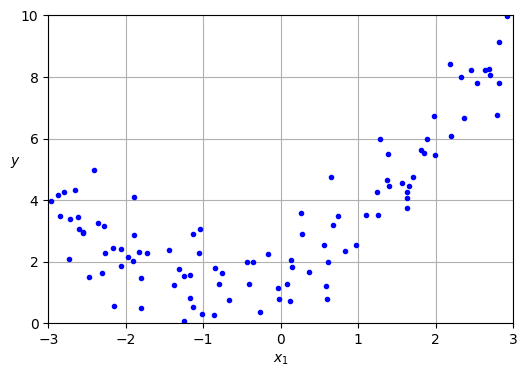

In [100]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)


plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [101]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0], X_poly[0])

[-0.75275929] [-0.75275929  0.56664654]


In [102]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

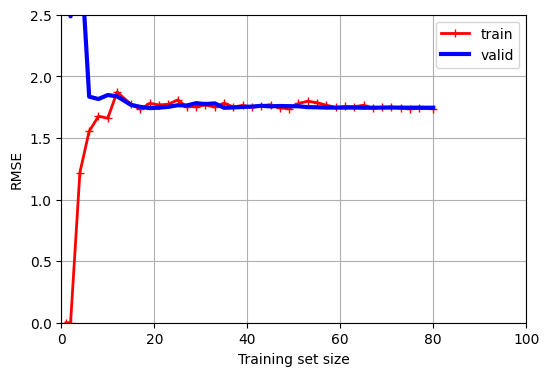

In [103]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1, 40),
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 100, 0, 2.5])

plt.show()

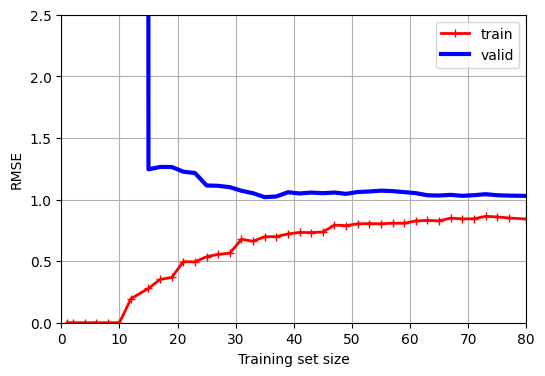

In [104]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40),
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()

0 [0.34674226]
10 [0.3077182]
100 [0.15287278]
100000 [0.0002732]


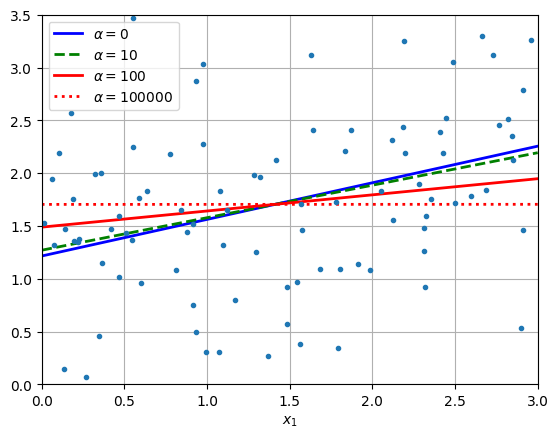

In [105]:
########## Lasso and Ridge Regression ##########

import numpy as np
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 100
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1)
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def linear_model(model_class, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b", "g--", "r-", "r:")):
      model = model_class(alpha, **model_kargs)
      model.fit(X, y)
      print(alpha, model.coef_)
      y_new = model.predict(X_new)
      plt.plot(X_new, y_new, style, linewidth=2, label=r"$\alpha = {}$".format(alpha))

linear_model(Ridge, alphas=(0, 10, 100, 100000))
plt.plot(X, y, ".")
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

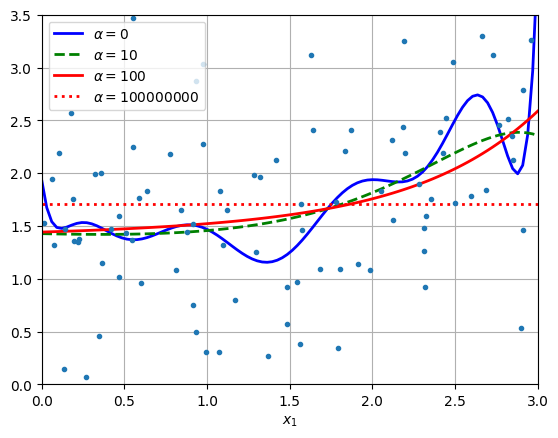

In [106]:
from sklearn.preprocessing import StandardScaler

def plot_poly_model(model_class, alphas, **model_kwargs):
    for alpha, style in zip(alphas, ("b", "g--", "r-", "r:")):
      model = model_class(alpha, **model_kwargs)
      model = make_pipeline(
          PolynomialFeatures(degree=10, include_bias=False),
          StandardScaler(),
          model)
      model.fit(X, y)
      y_new = model.predict(X_new)
      plt.plot(X_new, y_new, style, linewidth=2, label=r"$\alpha = {}$".format(alpha))
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()
plot_poly_model(Ridge, alphas=(0, 10, 100, 100000000))
plt.plot(X, y, ".")
plt.show()

In [107]:
np.random.seed(42)
m = 100
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1)

ridge_regression = Ridge(alpha=1, solver="cholesky")
ridge_regression.fit(X, y)
print(ridge_regression.coef_, ridge_regression.intercept_)

[0.34240003] [1.22122106]


In [108]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
print(sgd_reg.coef_, sgd_reg.intercept_)

[0.48805981] [0.95465828]


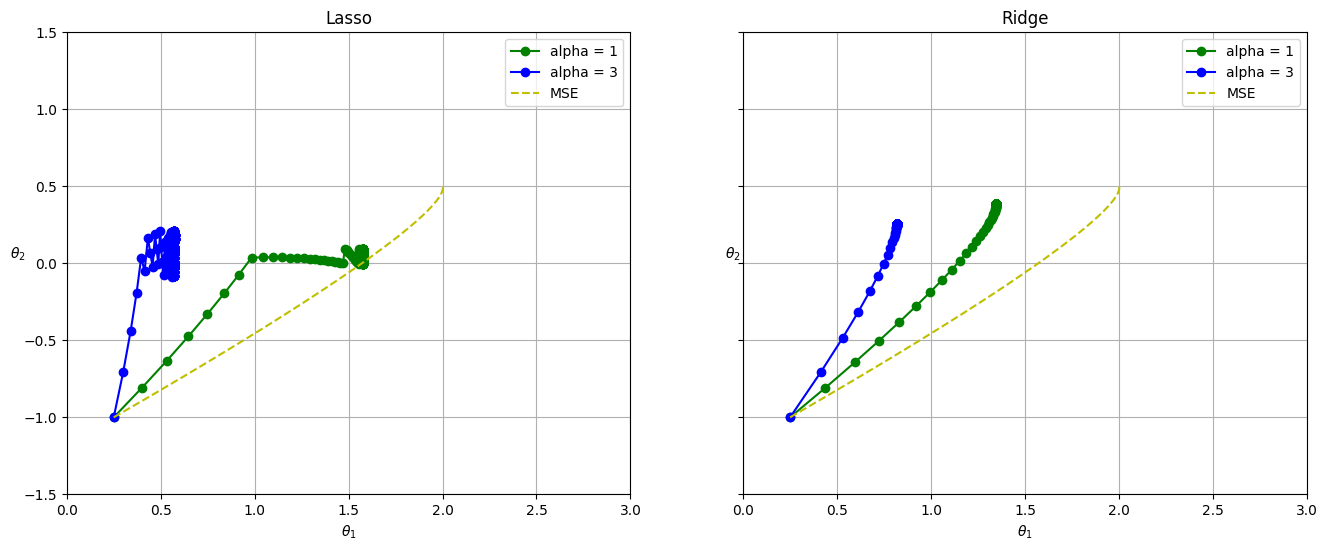

In [109]:
X = np.array([[1, 1], [1, -1], [1, 0.5]])
y = 2 * X[:, :1] + 0.5 * X[:, 1:]
theta = np.array([[0.25], [-1]])

def batch_gd_path(theta, X, y, l1, l2, n_iterations, eta, alpha):
    paths = [theta]
    for iteration in range(n_iterations):
        gradients = 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * alpha * np.sign(theta) + l2 * alpha * theta
        theta = theta - eta * gradients
        paths.append(theta)
    return np.array(paths)

path = batch_gd_path(theta, X, y, 0, 0, n_iterations=200, eta=0.05, alpha=0)
l1_path_alpha_1 = batch_gd_path(theta, X, y, 1, 0, n_iterations=200, eta=0.05, alpha=1)
l1_path_alpha_3 = batch_gd_path(theta, X, y, 1, 0, n_iterations=200, eta=0.05, alpha=3)
l2_path_alpha_1 = batch_gd_path(theta, X, y, 0, 1, n_iterations=200, eta=0.05, alpha=1)
l2_path_alpha_3 = batch_gd_path(theta, X, y, 0, 1, n_iterations=200, eta=0.05, alpha=3)

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 6))
ax = axes[0]
ax.grid()
ax.plot(l1_path_alpha_1[:, 0], l1_path_alpha_1[:, 1], "g-o", label="alpha = 1")
ax.plot(l1_path_alpha_3[:, 0], l1_path_alpha_3[:, 1], "b-o", label="alpha = 3")
ax.plot(path[:, 0], path[:, 1], "y--", label="MSE")
ax.axis([-1, 3, -1.5, 1.5])
ax.set_xlabel(r"$\theta_1$")
ax.set_ylabel(r"$\theta_2$", rotation=0)
ax.legend()
ax.set_title("Lasso")

ax = axes[1]
ax.grid()
ax.plot(l2_path_alpha_1[:, 0], l2_path_alpha_1[:, 1], "g-o", label="alpha = 1")
ax.plot(l2_path_alpha_3[:, 0], l2_path_alpha_3[:, 1], "b-o", label="alpha = 3")
ax.plot(path[:, 0], path[:, 1], "y--", label="MSE")
ax.axis([0, 3, -1.5, 1.5])
ax.set_xlabel(r"$\theta_1$")
ax.set_ylabel(r"$\theta_2$", rotation=0)
ax.legend()
ax.set_title("Ridge")


plt.show()